In [314]:
from sklearn import datasets,model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [315]:
random_state=6

In [316]:
x,y=datasets.make_regression(n_samples=100,n_features=1,n_targets=1,bias=20,noise=5,random_state=random_state)
if x.ndim > 1:  # Check if x is already 1D
    x = x.flatten() 
# x.shape,y.shape

In [317]:
d={"experience":x,"salary":y}
df=pd.DataFrame(data=d)
df.head(10)
train,test=model_selection.train_test_split(df,test_size=20,random_state=random_state)

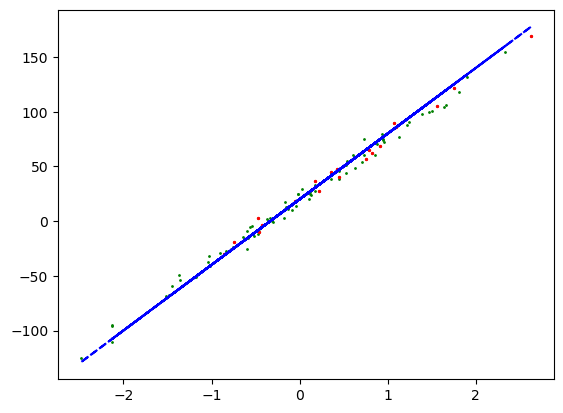

In [318]:
w1=60
w0=20
yhat=w1*x+w0


plt.scatter(x,y,c="green",s=1)
plt.scatter(test.iloc[:, 0], test.iloc[:, 1],c="red",s=2)
plt.plot(x,yhat,"--",c="blue")
plt.show()



In [319]:
def fn_yhat(xi, w1, w0):
    return w1 * xi + w0


def fn_mse(yhat, yi):
    e  = np.mean((yhat - yi) ** 2)
    return e
def fn_mae(yhat, yi):
    e  = np.mean(np.abs((yhat - yi) ))
    return e


def fn_grad_l_w1(xi, yhat, yi):
    return 2 * np.mean(xi * (yhat - yi))


def fn_grad_l_w0(yhat, yi):
    return 2 * np.mean((yhat - yi))


def gradient_dissent(xi, yi, w1, w0, eta, epochs):
    el_mse=[]
    el_mae=[]
    for epoch in range(epochs):
        yhat = fn_yhat(xi, w1, w0)
        mae = fn_mae(yhat, yi)
        el_mae.append(mae)
        
        mse = fn_mse(yhat, yi)
        el_mse.append(mse)
        
        # print(f"{epoch}: {e:.04}")

        grad_w1 = fn_grad_l_w1(xi, yhat, yi)
        grad_w0 = fn_grad_l_w0(yhat, yi)

        w1 = w1 - eta * grad_w1
        w0 = w0 - eta * grad_w0
    return el_mae,el_mse,w1,w0

epochs = 1000
eta = .1
w1 = 10
w0 = 10
el_mae,el_mse,w1f,w0f =gradient_dissent(train.iloc[:, 0], train.iloc[:, 1],w1,w0, eta, epochs)
w1f,w0f


(56.26316190483251, 19.684114807753154)

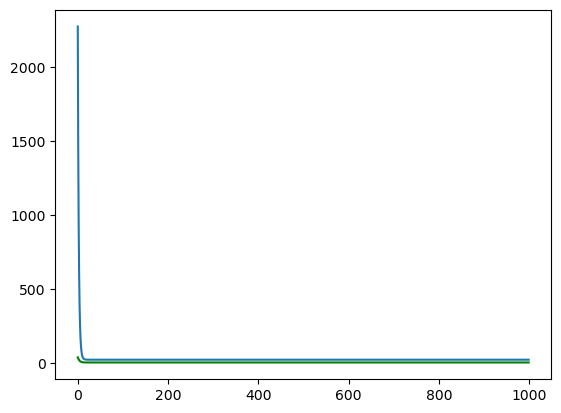

In [320]:
plt.plot(el_mae,color="green")    
plt.plot(el_mse)    


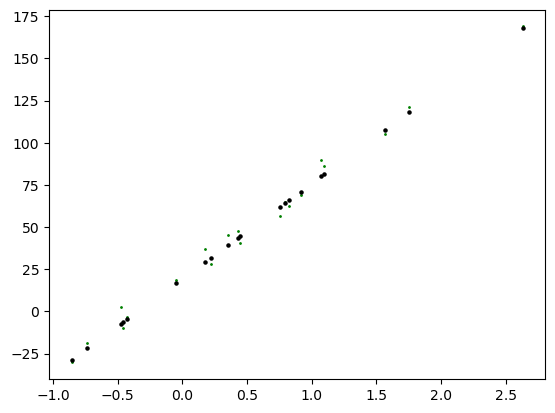

In [328]:
yhat_start = fn_yhat(train.iloc[:, 0], w1, w0)
# plt.scatter(train.iloc[:, 0], train.iloc[:, 1],c="green",s=1)
# plt.plot(train.iloc[:, 0],yhat_start,"--",c="blue")

# yhat_final = fn_yhat(train.iloc[:, 0], w1f, w0f)
# plt.plot(train.iloc[:, 0],yhat_final,"--",c="red")

plt.scatter(test.iloc[:, 0], test.iloc[:, 1],c="green",s=1)

ytest = fn_yhat(test.iloc[:, 0], w1f, w0f)
plt.scatter(test.iloc[:, 0], ytest,c="black",s=5)

plt.show()


In [330]:
mae=fn_mae(ytest,test.iloc[:, 1])
mse=fn_mse(ytest,test.iloc[:, 1])
rmse=np.sqrt(mse)
r2=1-np.mean((test.iloc[:, 1]-ytest)**2)/np.mean((test.iloc[:, 1]-np.mean(test.iloc[:, 1]))**2)

mae,mse,rmse,r2

(3.956281692532383, 22.257244041435502, 4.717758370395362, 0.9906309000539046)